You will use the Bird Species dataset from Kaggle.

https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification?resource=download

The dataset contains:
20 bird species
3208 training images, 100 test images(5 images per species)
100 validation images (5 images per species)
Your goal is to build an image classification model with the best possible performance. You will work in a group, and at the end, as a group you will present your work to your instructor and classmates.

### Imports

In [1]:
import os
from pathlib import Path
import random
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import PIL
from PIL import Image
import glob
import zipfile as ZipFile
import pathlib
from glob import iglob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Dropout, Flatten
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, Callback 
from sklearn.metrics import classification_report

In [2]:
data_dir = "/Users/Administrator/Downloads/bird folder"

### Data Exploration

In [3]:
#list of folders in the bird folder
list_dir=os.listdir(data_dir)

In [4]:
list_dir

['images to predict', 'test', 'train', 'valid']

In [5]:
for l in list_dir:
    list_d=[]
    what=os.listdir(data_dir+f'/{l}')
    list_d.append(what)
    print(np.unique(list_d))

['1.jpg' '2.jpg' '3.jpg' '4.jpg' '5.jpg' '6.jpg']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFR

As we can see here, other than the valid folder, they all have the same bird species

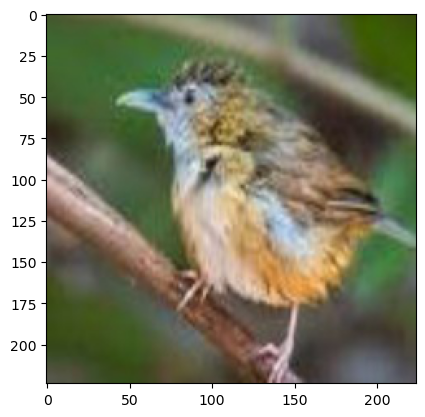

In [6]:
# example image

os.listdir(data_dir+'/train' + '/ABBOTTS BABBLER')[-1]

one_bird = data_dir + '/train' + '/ABBOTTS BABBLER' + '/147.jpg'

plt.imshow(imread(one_bird))

In [7]:
# Getting average image dimensions

w = []
h = []

rootdir_glob = '/Users/Administrator/Downloads/bird folder/**/*' 
file_list = [f for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]

for img in file_list:
    if img[-4:] == '.jpg':
        im = Image.open(img)
        w.append(im.size[0])
        h.append(im.size[1])

In [8]:
# Average width for all images

avg_h = round(sum(w)/len(w))

avg_h

224

In [9]:
# Average height for all images

avg_h = round(sum(h)/len(h))

avg_h

224

as we see here, the average length and height are (224,224)

### ImageDataGenerator

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rescale=1./255, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

In [143]:
# Train data 

train_dir = '/Users/Administrator/Downloads/bird folder/train' 
train_data = img_gen.flow_from_directory(train_dir,
                                          target_size=(224, 224),batch_size=64,class_mode='categorical',
                                         shuffle=True)

Found 3208 images belonging to 20 classes.


In [144]:
train_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

In [145]:
test_dir = '/Users/Administrator/Downloads/bird folder/test' 
test_data = img_gen.flow_from_directory(test_dir,
                                        target_size=(224, 224),batch_size=1,class_mode='categorical',
                                         shuffle=False)

Found 100 images belonging to 20 classes.


In [146]:
test_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

In [179]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras as keras
from tensorflow.keras import models, layers

In [170]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [171]:
base_model.trainable = False

In [172]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [204]:
vgg16_model=Sequential()
vgg16_model.add(base_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dense(units=20, activation='softmax'))

In [205]:
vgg16_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [206]:
vgg16_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_26 (Flatten)        (None, 25088)             0         
                                                                 
 dense_54 (Dense)            (None, 256)               6422784   
                                                                 
 dense_55 (Dense)            (None, 20)                5140      
                                                                 
Total params: 21,142,612
Trainable params: 6,427,924
Non-trainable params: 14,714,688
_________________________________________________________________


In [207]:
early_stop = EarlyStopping(monitor='val_loss', patience =2)

vgg16_model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[early_stop])

Epoch 1/10
51/51 [==============================] - 742s 14s/step - loss: 3.4505 - accuracy: 0.2905 - val_loss: 1.5103 - val_accuracy: 0.6000
Epoch 2/10
51/51 [==============================] - 752s 15s/step - loss: 1.2814 - accuracy: 0.6347 - val_loss: 1.1198 - val_accuracy: 0.6700
Epoch 3/10
51/51 [==============================] - 767s 15s/step - loss: 0.9844 - accuracy: 0.7076 - val_loss: 0.6091 - val_accuracy: 0.8200
Epoch 4/10
51/51 [==============================] - 704s 14s/step - loss: 0.7564 - accuracy: 0.7749 - val_loss: 0.7127 - val_accuracy: 0.7700
Epoch 5/10
51/51 [==============================] - 743s 15s/step - loss: 0.6430 - accuracy: 0.8077 - val_loss: 0.5013 - val_accuracy: 0.8700
Epoch 6/10
51/51 [==============================] - 744s 15s/step - loss: 0.5755 - accuracy: 0.8261 - val_loss: 0.4247 - val_accuracy: 0.9300
Epoch 7/10
51/51 [==============================] - 693s 14s/step - loss: 0.5014 - accuracy: 0.8519 - val_loss: 0.3541 - val_accuracy: 0.9000
Epoch 

In [208]:
metrics = pd.DataFrame(vgg16_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,3.450493,0.290524,1.510309,0.60
1,1.281394,0.634663,1.119809,0.67
2,0.984396,0.707606,0.609117,0.82
3,0.756379,0.774938,0.712651,0.77
4,0.643027,0.807668,0.501304,0.87
5,0.575508,0.826060,0.424725,0.93
6,0.501375,0.851933,0.354119,0.90
7,0.498999,0.842581,0.305359,0.92
8,0.460031,0.860037,0.450722,0.86
9,0.417160,0.872195,0.281517,0.92


<Axes: >

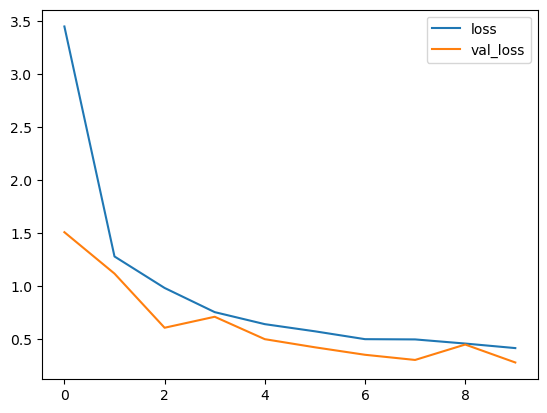

In [212]:
#loss plot
metrics[['loss','val_loss']].plot()

<Axes: >

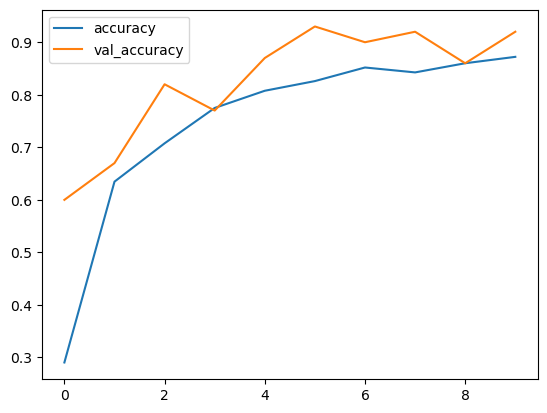

In [213]:
# accuracy plot
metrics[['accuracy','val_accuracy']].plot()

In [280]:
vgg16_pred = vgg16_model.predict(test_data)

100/100 [==============================] - 23s 232ms/step


In [281]:
vgg16_pred

array([[7.6766133e-01, 2.9225466e-03, 2.0164205e-06, ..., 2.9327710e-05,
        5.4761022e-04, 3.4740721e-04],
       [5.5359280e-01, 5.1920440e-02, 4.2337872e-04, ..., 2.3959631e-03,
        4.6117161e-03, 5.4152566e-03],
       [9.9813950e-01, 1.0673097e-07, 1.9873155e-10, ..., 8.6174523e-10,
        1.6614325e-04, 3.9796323e-06],
       ...,
       [2.9920699e-04, 1.4640976e-04, 5.5432302e-04, ..., 3.6265817e-05,
        1.5240228e-04, 9.4600588e-01],
       [5.1616807e-06, 3.8646868e-07, 4.9996050e-08, ..., 9.2847258e-10,
        4.0679388e-06, 9.9991357e-01],
       [7.5541856e-04, 1.4398871e-06, 7.4700395e-08, ..., 7.1472717e-10,
        6.8843787e-05, 9.9864477e-01]], dtype=float32)

In [214]:
# Classification report

vgg16_pred = vgg16_model.predict(test_data)

test_data.reset()

y_true = []

for i in range(len(test_data)):
    y_true.extend(np.argmax(test_data[i][1], axis=1))

y_true = np.array(y_true)

vgg_classes=np.argmax(vgg16_pred, axis=1)

print(classification_report(y_true, vgg_classes,
                            target_names=test_data.class_indices.keys()))

100/100 [==============================] - 24s 239ms/step
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      0.80      0.89         5
             ABBOTTS BOOBY       0.60      0.60      0.60         5
ABYSSINIAN GROUND HORNBILL       0.83      1.00      0.91         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       1.00      0.60      0.75         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      0.40      0.57         5
       AFRICAN PYGMY GOOSE       1.00      0.80      0.89         5
                 ALBATROSS       0.80      0.80      0.80         5
            ALBERTS TOWHEE       0.71      1.00      0.83         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      1.00      1.00

In [224]:
#model saving

!mkdir -p saved_model
vgg16_model.save('saved_model/vgg16_model')

INFO:tensorflow:Assets written to: saved_model/vgg16_model\assets


INFO:tensorflow:Assets written to: saved_model/vgg16_model\assets


In [225]:
new_model = tf.keras.models.load_model('saved_model/vgg16_model')

In [262]:
#predicted new images

dir_predict='/Users/Administrator/Downloads/bird folder/images to predict'

paths=glob.glob(os.path.join(dir_predict, '*.jpg'))

images_array = []
for path in paths:
    img = Image.open(path).resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    images_array.append(img_array)

In [285]:
multiple_pred=[]
for im in images_array:
    y_pred=np.array(vgg16_model.predict(im))
    print(y_pred)

1/1 [==============================] - 0s 337ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 225ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 218ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 226ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 220ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 258ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [290]:
test_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}